<a href="https://colab.research.google.com/github/Gabxist/Prog_ap/blob/main/Prog_ap_ANALISE_DE_DADOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!rm -r Prog_ap
!git clone https://github.com/Gabxist/Prog_ap.git

rm: cannot remove 'Prog_ap': No such file or directory
Cloning into 'Prog_ap'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 10 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (10/10), 1.09 MiB | 2.38 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [28]:
# importando os arquivos CSV como DataFrame do Pandas
pa_digit = pd.read_csv('/content/Prog_ap/PAs Digitalizados.csv', sep=";",skip_blank_lines=True)
proc_adm = pd.read_csv('/content/Prog_ap/Processos_Administrativos.csv', sep=";",skip_blank_lines=True)
print(pa_digit.columns)
print(proc_adm.columns)

Index(['PA', 'Processo Desenv. PA', 'Processo SEI', 'Código SIPRA',
       'Nome do Titular 1', 'CPF T1', 'VALIDAÇÃO CPF T1', 'Nome do Titular 2',
       'CPF T2', 'VALIDAÇÃO CPF T2', 'Lote/Parcela', 'Município', 'Tipo',
       'Especificação para Inclusão no SEI',
       'Informações para o Termo de Encerramento', 'Nº Folhas',
       'Desconformidades', 'Digitalizador', 'Data da Digitalização',
       'Responsável pela Indexação ao SEI', 'Data da Indexação ao SEI',
       'Observações', 'Link no SEI', 'Situação', 'Responsável Autenticação',
       'Qualidade', 'Origem'],
      dtype='object')
Index(['Processo SEI', 'Nome Outorgado', 'CPF/CNPJ Outorgado',
       'Cônjuge Outorgado', 'CPF Cônjuge', 'Imóvel', 'Gleba/Agrovila/Setor',
       'Lote/Parcela', 'Município', 'Tipo',
       'Especificação para Inclusão no SEI',
       'Informações para o Termo de Encerramento', 'Nº Folhas',
       'Desconformidades', 'Digitalizador', 'Data da Digitalização',
       'Responsável pela Indexação ao

Identificar por exemplo, relação entre tamanho do arquivo (nº de folhas) e data de digitalização / data de indexação
quantidade de processos por responsável Autenticação, etc
Dados relevantes:

Para os dados do arquivo PA digitalizados:

*   Município
*   Nº folhas
*   Desconformidades
*   Digitalizador
*   Data da Digitalização
*   Responsável peça Indexação ao SEI
*   Data da Indexação ao SEI
*   Qualidade (responsável pela verificação da qualidade)





Para os dados do arquivo Processos Administrativos:

* Município
* Tipo
* Nº folhas
* Desconformidades
* Digitalizador
* Data da Digitalização
* Responsável peça Indexação ao SEI
* Data da Indexação ao SEI
* Qualidade (responsável pela verificação da qualidade)

17.198979591836736


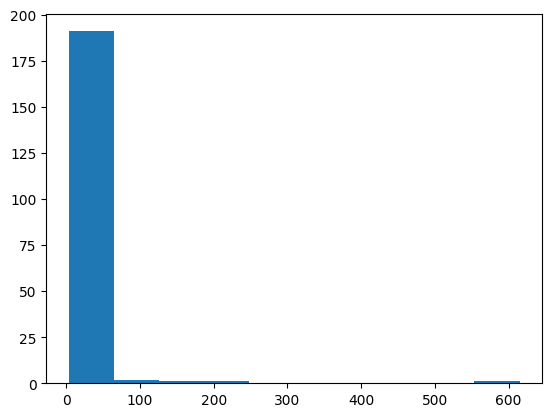

In [40]:
a =proc_adm['Nº Folhas']
plt.hist(a)
print(np.mean(a))

In [83]:
proc_adm['Data da Digitalização'] = pd.to_datetime(proc_adm['Data da Digitalização'])
proc_adm['Data da Indexação ao SEI'] = pd.to_datetime(proc_adm['Data da Indexação ao SEI'])
'''pa_digit['Data da Digitalização'] = pd.to_datetime(pa_digit['Data da Digitalização'],)'''
pa_digit['Data da Indexação ao SEI'] = pd.to_datetime(pa_digit['Data da Indexação ao SEI'],format='mixed')

DateParseError: Unknown datetime string format, unable to parse: DOC AVULSO, at position 22

In [45]:
print(np.max(proc_adm['Data da Digitalização']))
print(np.min(proc_adm['Data da Digitalização']))

2024-06-19 00:00:00
2023-10-11 00:00:00


In [74]:
proc_adm['demora indexação'] = proc_adm['Data da Indexação ao SEI'] - proc_adm['Data da Digitalização']
proc_adm['demora indexação'] = proc_adm['demora indexação'].dt.days
pa_digit['demora indexação'] = pa_digit['Data da Indexação ao SEI'] - pa_digit['Data da Digitalização']
pa_digit['demora indexação'] = pa_digit['demora indexação'].dt.days

TypeError: unsupported operand type(s) for -: 'str' and 'str'

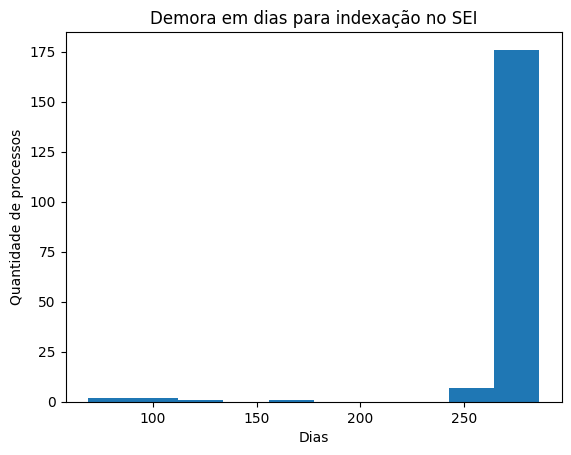

In [69]:
plt.hist(proc_adm['demora indexação'])
plt.title('Demora em dias para indexação no SEI')
plt.ylabel('Quantidade de processos')
plt.xlabel('Dias')
plt.show()

In [80]:
pa_digit.loc[22]

,22
PA,08 DE ABRIL
Processo Desenv. PA,PROCESSO DESENV. PA_-3794081395344042407
Processo SEI,PROCESSO SEI_7043859070606456673
Código SIPRA,CÓDIGO SIPRA_-6756033810914374038
Nome do Titular 1,NOME DO TITULAR 1_-2572612584356777955
CPF T1,CPF T1_-3870070733750714831
VALIDAÇÃO CPF T1,NaN
Nome do Titular 2,NOME DO TITULAR 2_6044131960214130119
CPF T2,CPF T2_-8348560377238328971
VALIDAÇÃO CPF T2,NaN
